### This is a program for trying our all the feature extraction using Librosa 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import csv

In [2]:
input_file_path='T:\\TOSHITH\\PROGRAMMING\\music_genere_classification\\genres_original'
output_file_path='T:\\TOSHITH\\PROGRAMMING\\music_genere_classification\\audio_features.csv'

In [11]:
# a sample audio file 
import librosa
#Fs is sampling frequency
#Ts is sampling period 
#N length of data 
no_of_samples=22050*30
blues_0,Fs=librosa.load("T:\TOSHITH\PROGRAMMING\music_genere_classification\genres_original\pop\pop.00000.wav")
blues_0=blues_0[:no_of_samples]
Ts=1/Fs
N=len(blues_0)
print(Fs,blues_0.shape)

22050 (661500,)


<>:7: SyntaxWarning: invalid escape sequence '\T'
<>:7: SyntaxWarning: invalid escape sequence '\T'
C:\Users\toshi\AppData\Local\Temp\ipykernel_74708\2554894806.py:7: SyntaxWarning: invalid escape sequence '\T'
  blues_0,Fs=librosa.load("T:\TOSHITH\PROGRAMMING\music_genere_classification\genres_original\pop\pop.00000.wav")


## First we will create all the feature extraction functions

In [12]:
FRAME_SIZE=4096 
#should be a power of 2 for FFT algorithm, and a frame size of 4096 equals to 200ms of audio length   
HOP_SIZE=2048 #to create overlapping frame for future calculations 

### 1. Amplitude envolope 

In [13]:
def amplitude_envolope(signal,N,FRAME_SIZE,HOP_SIZE):
    return np.array([max(signal[i:i+FRAME_SIZE]) for i in range(0,N,HOP_SIZE)])

In [14]:
amp_envelope=amplitude_envolope(blues_0,N,FRAME_SIZE,HOP_SIZE)
len(amp_envelope)

323

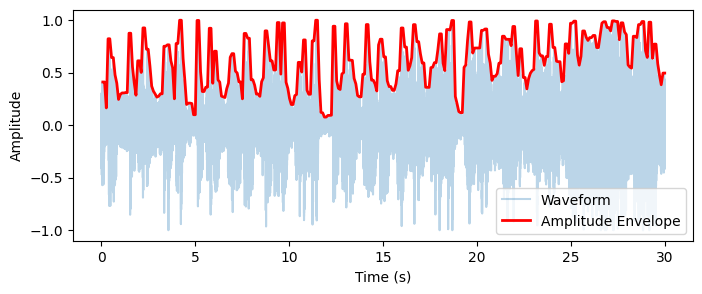

In [15]:
t = np.linspace(0, len(blues_0)/Fs, len(blues_0))
t_for_frames = librosa.frames_to_time(range(len(amp_envelope)), sr=Fs, hop_length=HOP_SIZE)
t_for_frames_centered = t_for_frames + (FRAME_SIZE / Fs) / 2  # Center of each frame

plt.figure(figsize=(8, 3))

# Plot waveform with low alpha for visibility
plt.plot(t, blues_0, alpha=0.3, label='Waveform')

# Plot amplitude envelope, centered at each frame
plt.plot(t_for_frames_centered, amp_envelope, color='red', linewidth=2, label='Amplitude Envelope')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc="lower right")
plt.show()

### 2. RMS Energy

In [16]:
rms_energy=librosa.feature.rms(y=blues_0,frame_length=FRAME_SIZE,hop_length=HOP_SIZE)[0] # as this returns a 2D matrix, we take the first row 

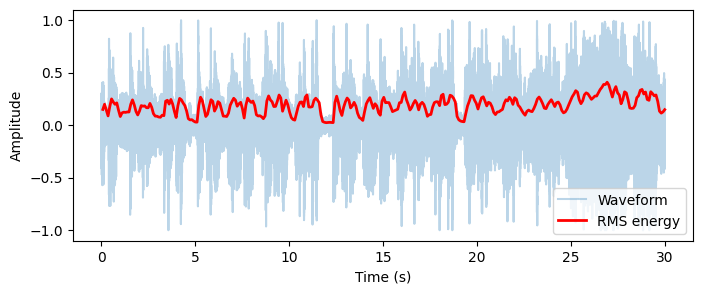

In [17]:
plt.figure(figsize=(8, 3))

# Plot waveform with low alpha for visibility
plt.plot(t, blues_0, alpha=0.3, label='Waveform')

# Plot amplitude envelope, centered at each frame
plt.plot(t_for_frames_centered, rms_energy, color='red', linewidth=2, label='RMS energy')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc="lower right")
plt.show()

### 3. Zero Crossing Rate

In [82]:
zero_cr=librosa.feature.zero_crossing_rate(y=blues_0,frame_length=FRAME_SIZE,hop_length=HOP_SIZE)[0]

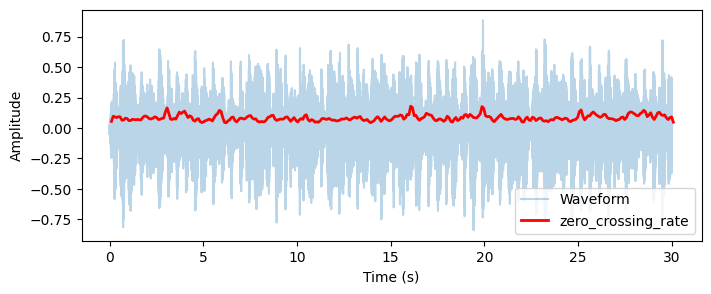

In [83]:
plt.figure(figsize=(8, 3))

# Plot waveform with low alpha for visibility
plt.plot(t, blues_0, alpha=0.3, label='Waveform')

# Plot amplitude envelope, centered at each frame
plt.plot(t_for_frames_centered, zero_cr, color='red', linewidth=2, label='zero_crossing_rate')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc="lower right")
plt.show()

### 4. spectral flux onset strength envelope

In [95]:
sfose = librosa.onset.onset_strength(y=blues_0, sr=Fs, hop_length=HOP_SIZE)
len(sfose)

324

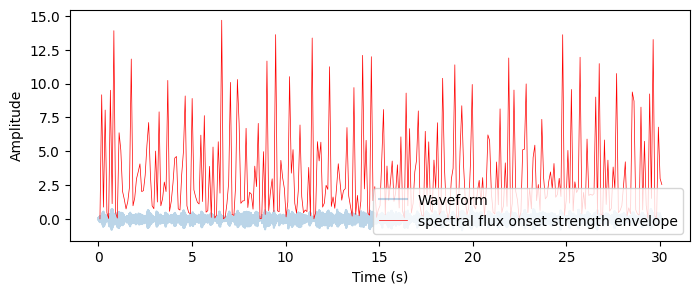

In [96]:
plt.figure(figsize=(8, 3))

# Plot waveform with low alpha for visibility
plt.plot(t, blues_0, alpha=0.3, label='Waveform')

# Plot amplitude envelope, centered at each frame
plt.plot(t_for_frames_centered, sfose, color='red', linewidth=0.5, label='spectral flux onset strength envelope')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc="lower right")
plt.show()

### 5. MFCC (Mel-Frequency Cepstral Coefficients )

In [ ]:
#we take 13 values per frame and use 1st and 2nd derivative to get 26 more values per frame 
mfcc = librosa.feature.mfcc(y=blues_0, n_mfcc=13, sr=Fs, hop_length=HOP_SIZE, n_fft=FRAME_SIZE)
mfcc=np.mean(mfcc,axis=0)
mfcc.shape ## approximate this as a time series data 

(324,)

In [ ]:
delta_mfcc=librosa.feature.delta(mfcc)
delta2_mfcc=librosa.feature.delta(mfcc,order=2)
delta2_mfcc.shape ## approximate this as a time series data

(324,)

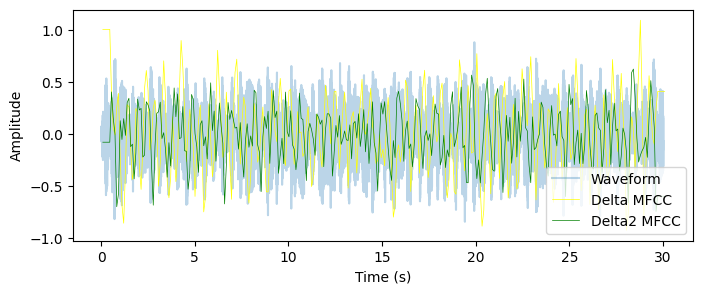

In [ ]:
plt.figure(figsize=(8, 3))

# Plot waveform with low alpha for visibility
plt.plot(t, blues_0, alpha=0.3, label='Waveform')

# Plot amplitude envelope, centered at each frame
plt.plot(t_for_frames_centered, mfcc, color='red', linewidth=0.5, label='MFCC')
plt.plot(t_for_frames_centered, delta_mfcc, color='yellow', linewidth=0.5, label='Delta MFCC')
plt.plot(t_for_frames_centered, delta2_mfcc, color='green', linewidth=0.5, label='Delta2 MFCC')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc="lower right")
plt.show()

In [ ]:
mfcc_coefficients = np.stack([mfcc, delta_mfcc, delta2_mfcc], axis=0)
mfcc_coefficients.shape # 3 coloums of time series data 

(3, 324)

### 6. Spectral centroid 

In [ ]:
spec_centroid = librosa.feature.spectral_centroid(y=blues_0, sr=Fs, hop_length=HOP_SIZE, n_fft=FRAME_SIZE)[0]

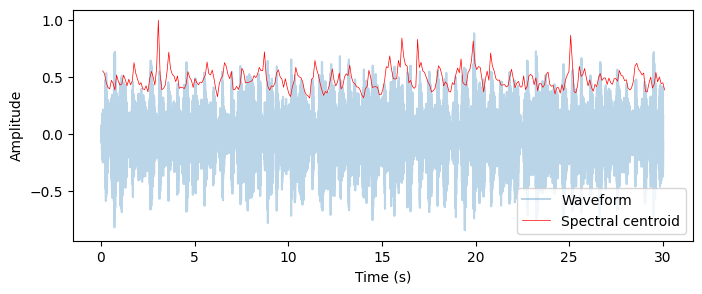

In [ ]:
plt.figure(figsize=(8, 3))

# Plot waveform with low alpha for visibility
plt.plot(t, blues_0, alpha=0.3, label='Waveform')

#normalizing for better visualization 
spec_centroid/=np.max(spec_centroid)

# Plot amplitude envelope, centered at each frame
plt.plot(t_for_frames_centered, spec_centroid, color='red', linewidth=0.5, label='Spectral centroid')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc="lower right")
plt.show()

### 7. Spectral Bandwidth 

In [126]:
spec_bandwidth=librosa.feature.spectral_bandwidth(y=blues_0, sr=Fs, hop_length=HOP_SIZE, n_fft=FRAME_SIZE)[0]
spec_bandwidth.shape

(324,)

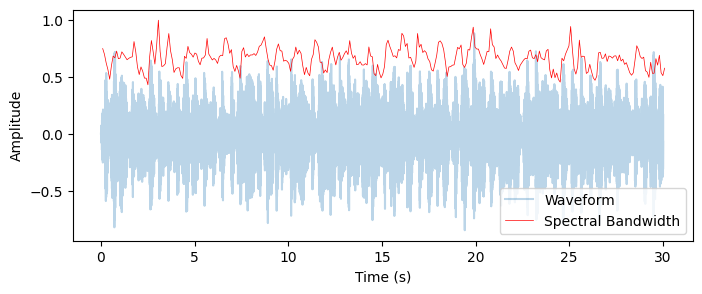

In [128]:
plt.figure(figsize=(8, 3))

# Plot waveform with low alpha for visibility
plt.plot(t, blues_0, alpha=0.3, label='Waveform')

#normalizing for better visualization 
spec_bandwidth/=np.max(spec_bandwidth)

# Plot amplitude envelope, centered at each frame
plt.plot(t_for_frames_centered, spec_bandwidth, color='red', linewidth=0.5, label='Spectral Bandwidth')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc="lower right")
plt.show()

### 8. Band Energy Ratio  

In [ ]:
def band_energy_ratio_calculator(split_freq,spectogram,sample_rate):
    freq_range=sample_rate/2
    freq_range_per_bin= freq_range/spectogram.shape[0]
    freq_bin_of_split_freq=int(np.floor(split_freq/freq_range_per_bin))
    #what bin does our split freq lie in so that we can get ratio of above and below 

    power_specturm=np.abs(spectogram)**2
    power_specturm=power_specturm.T

    band_energy_series=[]

    for freq_in_frame in power_specturm:
        sum_low_freq= np.sum(freq_in_frame[:freq_bin_of_split_freq])
        sum_high_freq= np.sum(freq_in_frame[freq_bin_of_split_freq:])

        band_energy_series.append(sum_low_freq/sum_high_freq)

    return np.array(band_energy_series)


In [ ]:
#we define an arbitrairy band F=2500Hz to split to calculate the Band energy ratio 
SPLIT_FREQ=2500

#short time fourier transform 
spectrogram_blues_0=librosa.stft(blues_0,n_fft=FRAME_SIZE,hop_length=HOP_SIZE)

band_energy_ratio=band_energy_ratio_calculator(SPLIT_FREQ,spectrogram_blues_0,Fs)
band_energy_ratio.shape

464


(324,)

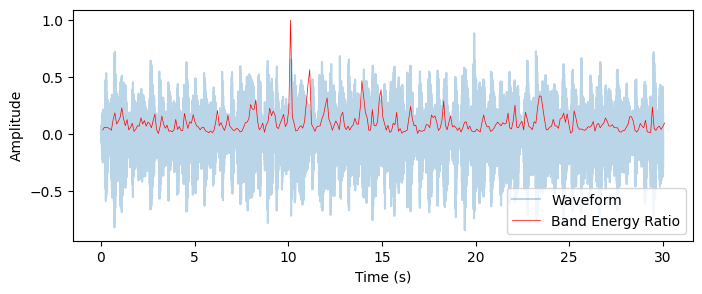

In [137]:
plt.figure(figsize=(8, 3))

# Plot waveform with low alpha for visibility
plt.plot(t, blues_0, alpha=0.3, label='Waveform')

#normalizing for better visualization 
band_energy_ratio/=np.max(band_energy_ratio)

# Plot amplitude envelope, centered at each frame
plt.plot(t_for_frames_centered, band_energy_ratio, color='red', linewidth=0.5, label='Band Energy Ratio')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc="lower right")
plt.show()